In [4]:
import io
import os, sys
import requests
import PIL

import torch
import torchvision.transforms as T
import torchvision.transforms.functional as TF

from dall_e          import map_pixels, unmap_pixels, load_model
from IPython.display import display, display_markdown

target_image_size = 256

def download_image(url):
    resp = requests.get(url)
    resp.raise_for_status()
    return PIL.Image.open(io.BytesIO(resp.content))

def preprocess(img):
    s = min(img.size)
    
    if s < target_image_size:
        raise ValueError(f'min dim for image {s} < {target_image_size}')
        
    r = target_image_size / s
    s = (round(r * img.size[1]), round(r * img.size[0]))
    img = TF.resize(img, s, interpolation=PIL.Image.LANCZOS)
    img = TF.center_crop(img, output_size=2 * [target_image_size])
    img = torch.unsqueeze(T.ToTensor()(img), 0)
    return map_pixels(img)

In [5]:
# This can be changed to a GPU, e.g. 'cuda:0'.
dev = torch.device('cpu')

# For faster load times, download these files locally and use the local paths instead.
enc = load_model("https://cdn.openai.com/dall-e/encoder.pkl", dev)
dec = load_model("https://cdn.openai.com/dall-e/decoder.pkl", dev)

C:\Users\SHUBH\AppData\Local\Temp\ipykernel_5936\3833217327.py:28: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = TF.resize(img, s, interpolation=PIL.Image.LANCZOS)
C:\Users\SHUBH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torchvision\transforms\functional.py:417: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


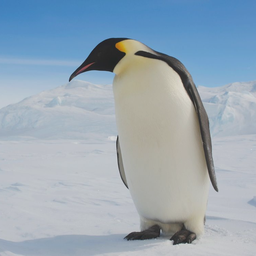

In [6]:
x = preprocess(download_image('https://assets.bwbx.io/images/users/iqjWHBFdfxIU/iKIWgaiJUtss/v2/1000x-1.jpg'))
display_markdown('Original image:')
display(T.ToPILImage(mode='RGB')(x[0]))

In [7]:
import torch.nn.functional as F

z_logits = enc(x)
z = torch.argmax(z_logits, axis=1)
z = F.one_hot(z, num_classes=enc.vocab_size).permute(0, 3, 1, 2).float()

x_stats = dec(z).float()
x_rec = unmap_pixels(torch.sigmoid(x_stats[:, :3]))
x_rec = T.ToPILImage(mode='RGB')(x_rec[0])

display_markdown('Reconstructed image:')
display(x_rec)

AttributeError: 'Upsample' object has no attribute 'recompute_scale_factor'

In [2]:
! pip install requests --user

     ---------------------------------------- 62.8/62.8 KB 3.5 MB/s eta 0:00:00
     -------------------------------------- 140.4/140.4 KB 8.7 MB/s eta 0:00:00
     ---------------------------------------- 61.5/61.5 KB 3.2 MB/s eta 0:00:00
     -------------------------------------- 161.1/161.1 KB 9.4 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\SHUBH\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [3]:
! pip install dall_e --user

  Using cached DALL_E-0.1-py3-none-any.whl (6.0 kB)
  Using cached torchvision-0.13.1-cp39-cp39-win_amd64.whl (1.1 MB)
  Using cached mypy-0.981-cp39-cp39-win_amd64.whl (8.5 MB)
     ---------------------------------------- 3.3/3.3 MB 23.3 MB/s eta 0:00:00
  Using cached blobfile-1.3.4-py3-none-any.whl (73 kB)
  Using cached torch-1.12.1-cp39-cp39-win_amd64.whl (161.8 MB)
  Using cached pytest-7.1.3-py3-none-any.whl (298 kB)
     --------------------------------------- 14.7/14.7 MB 19.9 MB/s eta 0:00:00
  Using cached pycryptodomex-3.15.0-cp35-abi3-win_amd64.whl (1.9 MB)
  Using cached filelock-3.8.0-py3-none-any.whl (10 kB)
  Using cached lxml-4.9.1-cp39-cp39-win_amd64.whl (3.6 MB)
  Using cached mypy_extensions-0.4.3-py2.py3-none-any.whl (4.5 kB)
  Using cached attrs-22.1.0-py2.py3-none-any.whl (58 kB)
  Using cached iniconfig-1.1.1-py2.py3-none-any.whl (5.0 kB)
  Using cached pluggy-1.0.0-py2.py3-none-any.whl (13 kB)
  Using cached py-1.11.0-py2.py3-none-any.whl (98 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\SHUBH\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.
